In [17]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, ttest_1samp

In [12]:
# Load the dataset
df = pd.read_csv("Data/winequality-red.csv")


In [15]:
description_summary = []

for col in df.describe().columns:
    desc = df[col].describe()
    description_summary.append([col, desc['count'], desc['mean'], desc['std'], desc['min'], desc['25%'], desc['50%'], desc['75%'], desc['max']])

# Convert to a DataFrame
description_summary_df = pd.DataFrame(description_summary, columns=['Column', 'Count', 'Mean', 'Std', 'Min', 
                                            '25%', '50%', '75%', 'Max'])

# Write the summary table as a csv
description_summary_df.to_csv("description_summary.csv", index=False)

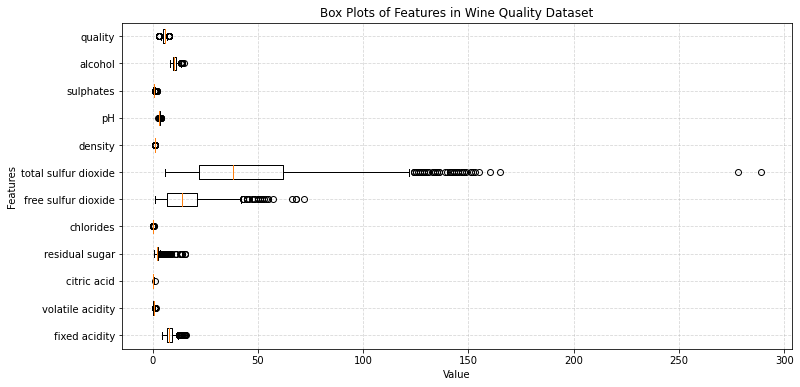

In [19]:
# Plot box plots for all numerical columns
plt.figure(figsize=(12, 6))
plt.boxplot([df[col] for col in df.describe().columns], vert=False, labels=df.describe().columns)
plt.title("Box Plots of Features in Wine Quality Dataset")
plt.xlabel("Value")
plt.ylabel("Features")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

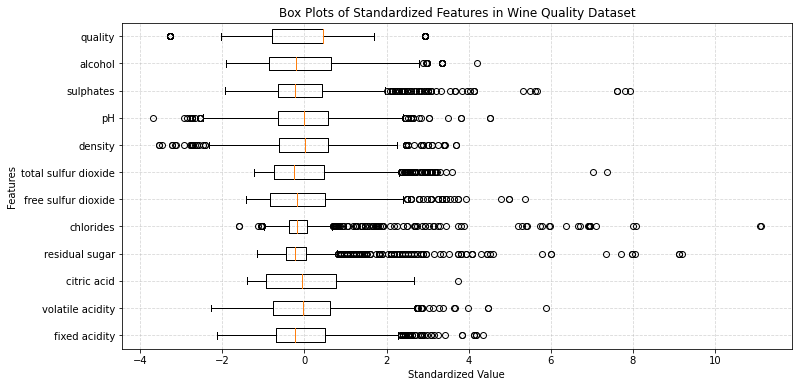

In [20]:
# Standardize the columns (Z-score normalization)
standardized_df = (df - df.mean()) / df.std()

# Plot box plots for standardized data
plt.figure(figsize=(12, 6))
plt.boxplot([standardized_df[col] for col in standardized_df.columns], vert=False, labels=standardized_df.columns)
plt.title("Box Plots of Standardized Features in Wine Quality Dataset")
plt.xlabel("Standardized Value")
plt.ylabel("Features")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


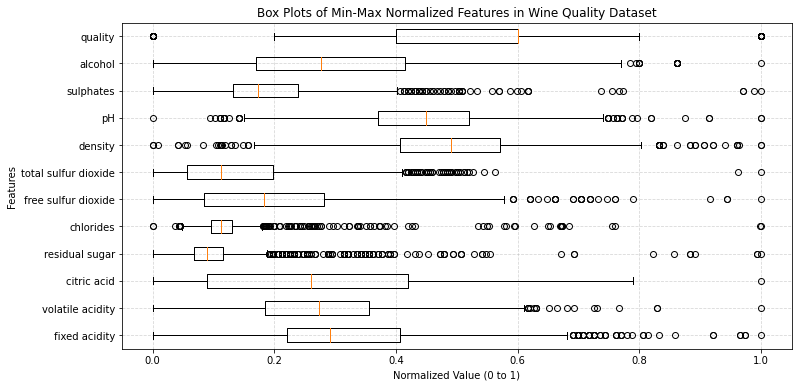

In [21]:
# Min-Max Normalization
normalized_df = (df - df.min()) / (df.max() - df.min())

# Plot box plots for Min-Max normalized data
plt.figure(figsize=(12, 6))
plt.boxplot([normalized_df[col] for col in normalized_df.columns], vert=False, labels=normalized_df.columns)
plt.title("Box Plots of Min-Max Normalized Features in Wine Quality Dataset")
plt.xlabel("Normalized Value (0 to 1)")
plt.ylabel("Features")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


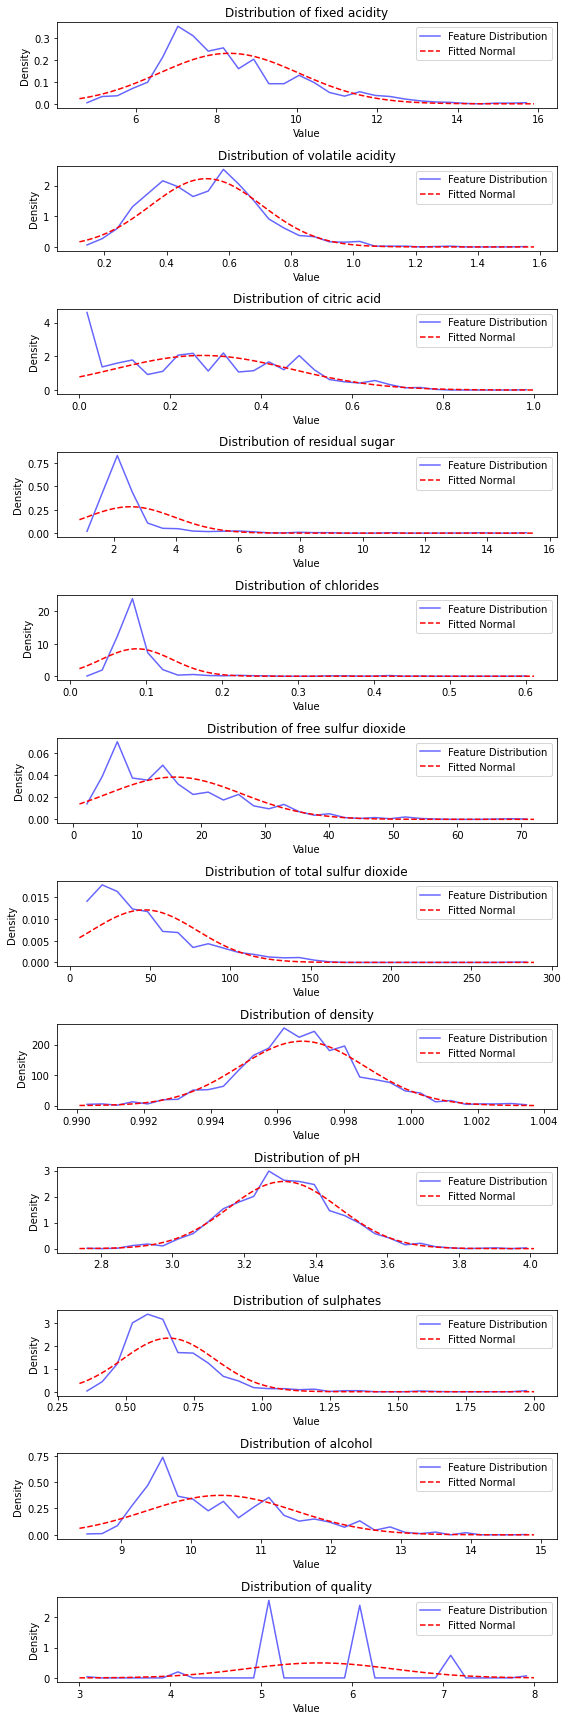

In [22]:
from scipy.stats import norm

# Load the dataset
df = pd.read_csv("Data/winequality-red.csv")

# Set up the figure with subplots
num_features = len(df.columns)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(8, 2 * num_features))

# Loop through each feature and plot its histogram + normal distribution
for i, col in enumerate(df.columns):
    ax = axes[i]  # Select subplot
    data = df[col]
    
    # Compute histogram
    hist_values, bin_edges = np.histogram(data, bins=30, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Get bin centers for plotting
    
    # Fit a normal distribution to the data
    mu, sigma = np.mean(data), np.std(data)
    x = np.linspace(data.min(), data.max(), 100)
    normal_dist = norm.pdf(x, mu, sigma)
    
    # Plot histogram and normal distribution
    ax.plot(bin_centers, hist_values, label="Feature Distribution", color="blue", alpha=0.6)
    ax.plot(x, normal_dist, label="Fitted Normal", color="red", linestyle="dashed")
    
    # Labels and title
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


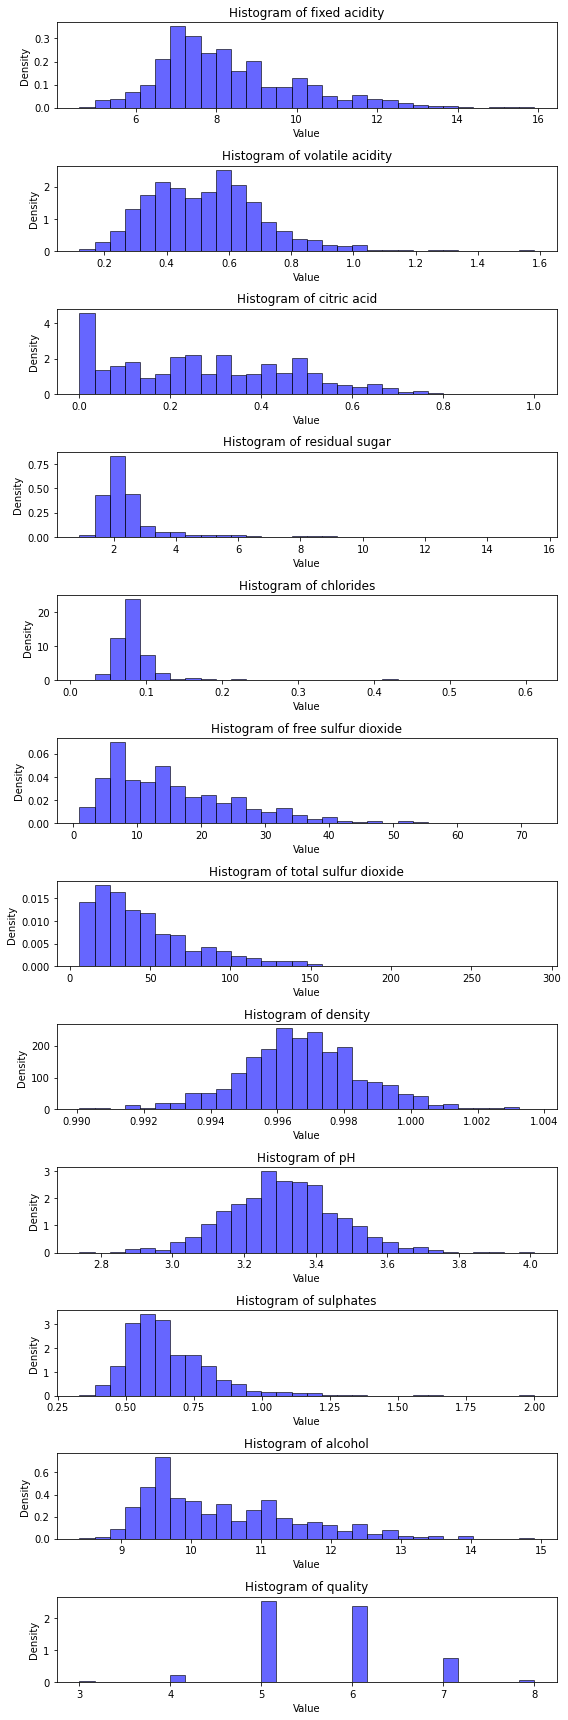

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("Data/winequality-red.csv")

# Set up the figure with subplots
num_features = len(df.columns)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(8, 2 * num_features))

# Loop through each feature and plot its histogram
for i, col in enumerate(df.columns):
    ax = axes[i]  # Select subplot
    data = df[col]
    
    # Plot histogram
    ax.hist(data, bins=30, density=True, alpha=0.6, color="blue", edgecolor="black")
    
    # Labels and title
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
